<a href="https://colab.research.google.com/github/kixtter/AnalisisInteligenteDatos/blob/main/Unidad%201/Caso_9_Regresion_lineal_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caso 9. Regresión lineal multipla

Yander Alexis Avila Medina

##Objetivo
Construir e interpretar modelos de regresión lineal multiple.

##Descripción
Se cargan librerías necesarias.

Se cargan los datos.

Se fragmentan los datos en datos de 
entrenamiento y validación.

Se construye el modelo de regresión lineal multiple.

Se interpretan los datos estadísticos del modelo R Square Adjusted y los coeficientes de la ecuación.

$$
y = a + \beta_0 \cdot{x_1} + \beta_1\cdot{x_2} + \beta_2\cdot{x_3} + ... + \beta_k \cdot {x_k} + \epsilon
$$ 


##Marco conceptual

En la mayoría de los problemas de investifación en los que se aplica el análisis de regresión se necesita más de una variable independiente para el modelo de regresión.

La complejidad de la mayoría de mecanismos científicos es tal que, con el fin de predecir una respuesta importante, se requiere un modelo de regresión múltiple. Cuando un modelo es lineal en los coeficientes se denomica modelo de regresión lineal múltiple.

Para el caso de k variables independientes, el modelo que da x1, x2,..., xk y como la variabla dependiente x1, x2,..., xk son las variables que afectan a la varialbe dependiente en el modelo de regresión lineal múltiple.

Muchos problemas de investigación y de la industria, requieren la estimación de la relaciones existentes entre el patrón de variabilidad de una variable aleatoria y los valores de una o más variables aleatorias.

Al generar un modelo de regresión lineal múltiple es importante identificar los estadísticos de R2 R Square, que se denomina coeficiente de determinación y es una medida de la proporción de la variabilidad explicada por el modelo ajustado.

De igual forma, el valos de R2 ajustado o coeficiente de determinación ajustado, es una variación de R2 que proporciona un ajuste para los grados de libertad. R Square ajustado esta diseñado para proporcionar un estadístico que castigue un modelo sobreajustado, de manera que se puede esperar que favorezca al modelo.

Una variable Y puede predecirse conforme y de acuerdo con:

$$
y = a + \beta_0 \cdot{x_1} + \beta_1\cdot{x_2} + \beta_2\cdot{x_3} + ... + \beta_k \cdot {x_k} + \epsilon
$$ 

##Descripción de los datos

El dataset corresponde a las variantes rojas del vino portugués "Vinho Verde". Debido a cuestiones de privacidad y logística, sólo se dispone de variables físico-químicas (los insumos) y sensoriales (el producto) (por ejemplo, no hay datos sobre los tipos de uva, la marca del vino, el precio de venta del vino, etc.).

Tendremos en cuenta varios atributos de entrada como acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos, alcohol. Basándonos en estos atributos predeciremos la calidad del vino.

##Desarrollo

##Carga de librerias

In [79]:
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
plt.style.use('ggplot')

#Preprocesado y análisis
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
%matplotlib inline

##Carga de datos

In [80]:
datosVino = pd.read_csv('https://raw.githubusercontent.com/kixtter/AnalisisInteligenteDatos/main/Datos/winequality-red.csv')
datosVino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [81]:
datosVino.shape

(1599, 12)

In [82]:
datosVino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Limpiemos un poco nuestros datos, así que primero comprobemos cuáles son las columnas que contienen valores NaN (Que no son un número)

In [83]:
datosVino.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Una vez que el código anterior se ejecuta, todas las columnas deben dar False, en caso de que para cualquier columna se encuentre el resultado True, entonces se eliminan todos los valores nulos de esa columna usando el código siguiente.

In [84]:
datosVino = datosVino.fillna(method='ffill')

##Visualización de los datos

###Despersión de los datos

#### fixed acidity vs quality

Text(0, 0.5, 'quality')

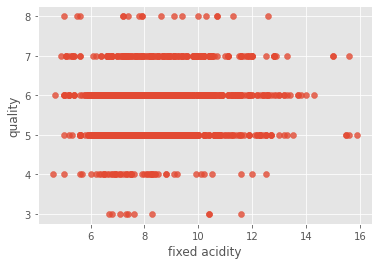

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x=datosVino['fixed acidity'], y=datosVino['quality'], alpha = 0.8)
ax.set_xlabel('fixed acidity')
ax.set_ylabel('quality')

####volatile acidity vs quality

Text(0, 0.5, 'quality')

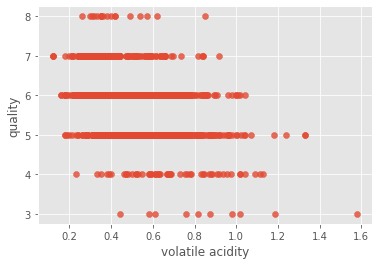

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x=datosVino['volatile acidity'], y=datosVino['quality'], alpha = 0.8)
ax.set_xlabel('volatile acidity')
ax.set_ylabel('quality')

####citric acid vs quality

Text(0, 0.5, 'quality')

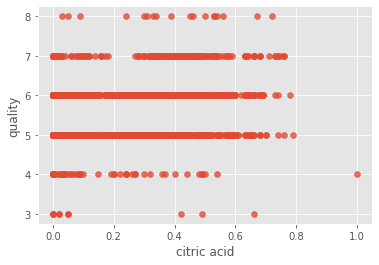

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x=datosVino['citric acid'], y=datosVino['quality'], alpha = 0.8)
ax.set_xlabel('citric acid')
ax.set_ylabel('quality')

####residual sugar vs quality

Text(0, 0.5, 'quality')

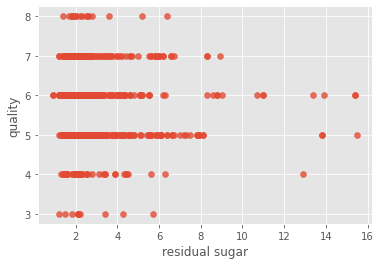

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x=datosVino['residual sugar'], y=datosVino['quality'], alpha = 0.8)
ax.set_xlabel('residual sugar')
ax.set_ylabel('quality')

###chlorides vs quality

Text(0, 0.5, 'quality')

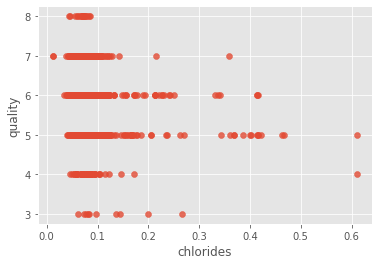

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x=datosVino['chlorides'], y=datosVino['quality'], alpha = 0.8)
ax.set_xlabel('chlorides')
ax.set_ylabel('quality')

####free sulfur dioxide vs quality

Text(0, 0.5, 'quality')

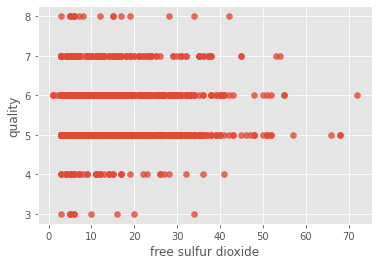

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x=datosVino['free sulfur dioxide'], y=datosVino['quality'], alpha = 0.8)
ax.set_xlabel('free sulfur dioxide')
ax.set_ylabel('quality')

####total sulfur dioxide vs quality

Text(0, 0.5, 'quality')

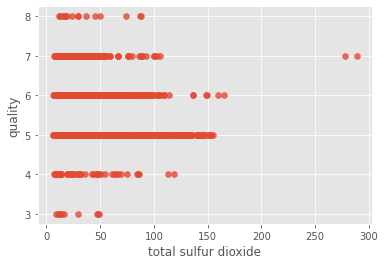

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x=datosVino['total sulfur dioxide'], y=datosVino['quality'], alpha = 0.8)
ax.set_xlabel('total sulfur dioxide')
ax.set_ylabel('quality')

####density vs quality

Text(0, 0.5, 'quality')

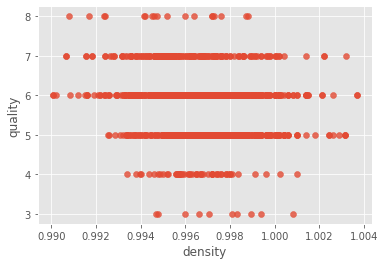

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x=datosVino['density'], y=datosVino['quality'], alpha = 0.8)
ax.set_xlabel('density')
ax.set_ylabel('quality')

####pH vs quality

Text(0, 0.5, 'quality')

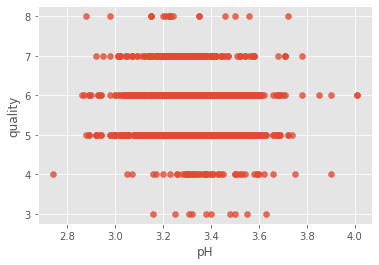

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x=datosVino['pH'], y=datosVino['quality'], alpha = 0.8)
ax.set_xlabel('pH')
ax.set_ylabel('quality')

####sulphates vs quality

Text(0, 0.5, 'quality')

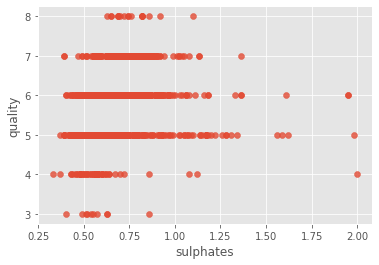

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x=datosVino['sulphates'], y=datosVino['quality'], alpha = 0.8)
ax.set_xlabel('sulphates')
ax.set_ylabel('quality')

####alcohol vs quality

Text(0, 0.5, 'quality')

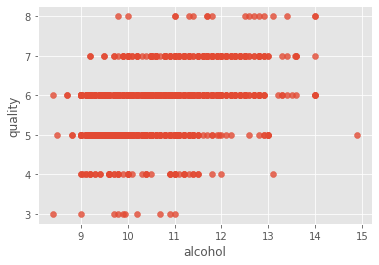

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x=datosVino['alcohol'], y=datosVino['quality'], alpha = 0.8)
ax.set_xlabel('alcohol')
ax.set_ylabel('quality')

##Normalidad de los datos


Text(0, 0.5, 'counts')

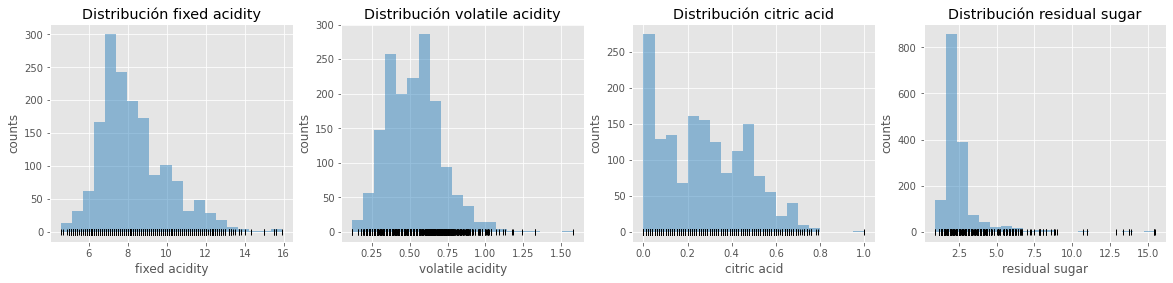

In [96]:
fig, axs = plt.subplots(nrows = 1, ncols= 4, figsize=(20,4))

axs[0].hist(x=datosVino['fixed acidity'], bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(datosVino['fixed acidity'], np.full_like(datosVino['fixed acidity'], -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución fixed acidity')
axs[0].set_xlabel('fixed acidity')
axs[0].set_ylabel('counts')

axs[1].hist(x=datosVino['volatile acidity'], bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(datosVino['volatile acidity'], np.full_like(datosVino['volatile acidity'], -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución volatile acidity')
axs[1].set_xlabel('volatile acidity')
axs[1].set_ylabel('counts')

axs[2].hist(x=datosVino['citric acid'], bins=20, color="#3182bd", alpha=0.5)
axs[2].plot(datosVino['citric acid'], np.full_like(datosVino['citric acid'], -0.01), '|k', markeredgewidth=1)
axs[2].set_title('Distribución citric acid')
axs[2].set_xlabel('citric acid')
axs[2].set_ylabel('counts')

axs[3].hist(x=datosVino['residual sugar'], bins=20, color="#3182bd", alpha=0.5)
axs[3].plot(datosVino['residual sugar'], np.full_like(datosVino['residual sugar'], -0.01), '|k', markeredgewidth=1)
axs[3].set_title('Distribución residual sugar')
axs[3].set_xlabel('residual sugar')
axs[3].set_ylabel('counts')

Text(0, 0.5, 'counts')

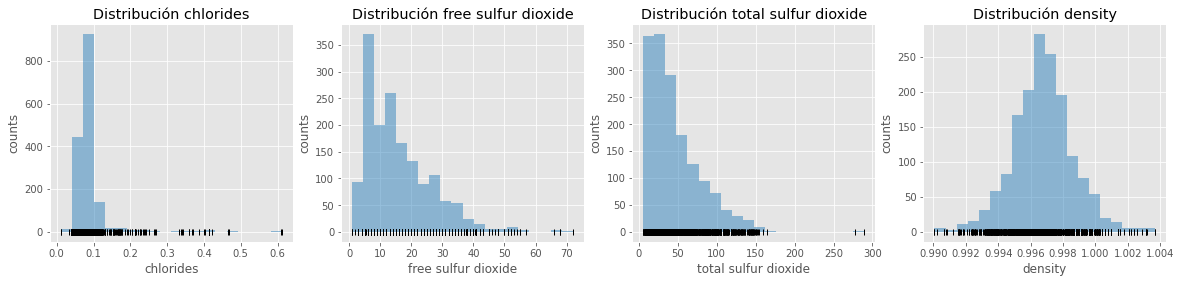

In [97]:
fig, axs = plt.subplots(nrows = 1, ncols= 4, figsize=(20,4))

axs[0].hist(x=datosVino['chlorides'], bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(datosVino['chlorides'], np.full_like(datosVino['chlorides'], -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución chlorides')
axs[0].set_xlabel('chlorides')
axs[0].set_ylabel('counts')

axs[1].hist(x=datosVino['free sulfur dioxide'], bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(datosVino['free sulfur dioxide'], np.full_like(datosVino['free sulfur dioxide'], -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución free sulfur dioxide')
axs[1].set_xlabel('free sulfur dioxide')
axs[1].set_ylabel('counts')

axs[2].hist(x=datosVino['total sulfur dioxide'], bins=20, color="#3182bd", alpha=0.5)
axs[2].plot(datosVino['total sulfur dioxide'], np.full_like(datosVino['total sulfur dioxide'], -0.01), '|k', markeredgewidth=1)
axs[2].set_title('Distribución total sulfur dioxide')
axs[2].set_xlabel('total sulfur dioxide')
axs[2].set_ylabel('counts')

axs[3].hist(x=datosVino['density'], bins=20, color="#3182bd", alpha=0.5)
axs[3].plot(datosVino['density'], np.full_like(datosVino['density'], -0.01), '|k', markeredgewidth=1)
axs[3].set_title('Distribución density')
axs[3].set_xlabel('density')
axs[3].set_ylabel('counts')


Text(0, 0.5, 'counts')

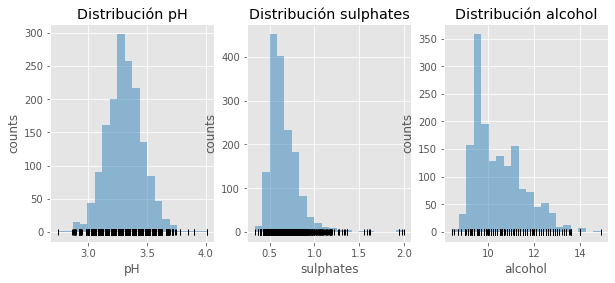

In [98]:
fig, axs = plt.subplots(nrows = 1, ncols= 3, figsize=(10,4))

axs[0].hist(x=datosVino['pH'], bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(datosVino['pH'], np.full_like(datosVino['pH'], -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución pH')
axs[0].set_xlabel('pH')
axs[0].set_ylabel('counts')

axs[1].hist(x=datosVino['sulphates'], bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(datosVino['sulphates'], np.full_like(datosVino['sulphates'], -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución sulphates')
axs[1].set_xlabel('sulphates')
axs[1].set_ylabel('counts')

axs[2].hist(x=datosVino['alcohol'], bins=20, color="#3182bd", alpha=0.5)
axs[2].plot(datosVino['alcohol'], np.full_like(datosVino['alcohol'], -0.01), '|k', markeredgewidth=1)
axs[2].set_title('Distribución alcohol')
axs[2].set_xlabel('alcohol')
axs[2].set_ylabel('counts')

##Correlación de las variables

In [99]:
print('Correlación fixed acidity y quality')
print('Correlación Pearson: ', datosVino['fixed acidity'].corr(datosVino['quality'], method = 'pearson'))
print('Correlación spearman: ', datosVino['fixed acidity'].corr(datosVino['quality'], method = 'spearman'))
print('Correlación kendall: ', datosVino['fixed acidity'].corr(datosVino['quality'], method = 'kendall'))
print()

print('Correlación volatile acidity y quality')
print('Correlación Pearson: ', datosVino['volatile acidity'].corr(datosVino['quality'], method = 'pearson'))
print('Correlación spearman: ', datosVino['volatile acidity'].corr(datosVino['quality'], method = 'spearman'))
print('Correlación kendall: ', datosVino['volatile acidity'].corr(datosVino['quality'], method = 'kendall'))
print()

print('Correlación citric acid y quality')
print('Correlación Pearson: ', datosVino['citric acid'].corr(datosVino['quality'], method = 'pearson'))
print('Correlación spearman: ', datosVino['citric acid'].corr(datosVino['quality'], method = 'spearman'))
print('Correlación kendall: ', datosVino['citric acid'].corr(datosVino['quality'], method = 'kendall'))
print()

print('Correlación residual sugar y quality')
print('Correlación Pearson: ', datosVino['residual sugar'].corr(datosVino['quality'], method = 'pearson'))
print('Correlación spearman: ', datosVino['residual sugar'].corr(datosVino['quality'], method = 'spearman'))
print('Correlación kendall: ', datosVino['residual sugar'].corr(datosVino['quality'], method = 'kendall'))
print()

print('Correlación chlorides y quality')
print('Correlación Pearson: ', datosVino['chlorides'].corr(datosVino['quality'], method = 'pearson'))
print('Correlación spearman: ', datosVino['chlorides'].corr(datosVino['quality'], method = 'spearman'))
print('Correlación kendall: ', datosVino['chlorides'].corr(datosVino['quality'], method = 'kendall'))
print()

print('Correlación free sulfur dioxide y quality')
print('Correlación Pearson: ', datosVino['free sulfur dioxide'].corr(datosVino['quality'], method = 'pearson'))
print('Correlación spearman: ', datosVino['free sulfur dioxide'].corr(datosVino['quality'], method = 'spearman'))
print('Correlación kendall: ', datosVino['free sulfur dioxide'].corr(datosVino['quality'], method = 'kendall'))
print()

print('Correlación total sulfur dioxide y quality')
print('Correlación Pearson: ', datosVino['total sulfur dioxide'].corr(datosVino['quality'], method = 'pearson'))
print('Correlación spearman: ', datosVino['total sulfur dioxide'].corr(datosVino['quality'], method = 'spearman'))
print('Correlación kendall: ', datosVino['total sulfur dioxide'].corr(datosVino['quality'], method = 'kendall'))
print()

print('Correlación density y quality')
print('Correlación Pearson: ', datosVino['density'].corr(datosVino['quality'], method = 'pearson'))
print('Correlación spearman: ', datosVino['density'].corr(datosVino['quality'], method = 'spearman'))
print('Correlación kendall: ', datosVino['density'].corr(datosVino['quality'], method = 'kendall'))
print()

print('Correlación pH y quality')
print('Correlación Pearson: ', datosVino['pH'].corr(datosVino['quality'], method = 'pearson'))
print('Correlación spearman: ', datosVino['pH'].corr(datosVino['quality'], method = 'spearman'))
print('Correlación kendall: ', datosVino['pH'].corr(datosVino['quality'], method = 'kendall'))
print()

print('Correlación sulphates y quality')
print('Correlación Pearson: ', datosVino['sulphates'].corr(datosVino['quality'], method = 'pearson'))
print('Correlación spearman: ', datosVino['sulphates'].corr(datosVino['quality'], method = 'spearman'))
print('Correlación kendall: ', datosVino['sulphates'].corr(datosVino['quality'], method = 'kendall'))
print()

print('Correlación alcohol y quality')
print('Correlación Pearson: ', datosVino['alcohol'].corr(datosVino['quality'], method = 'pearson'))
print('Correlación spearman: ', datosVino['alcohol'].corr(datosVino['quality'], method = 'spearman'))
print('Correlación kendall: ', datosVino['alcohol'].corr(datosVino['quality'], method = 'kendall'))
print()

Correlación fixed acidity y quality
Correlación Pearson:  0.12405164911322428
Correlación spearman:  0.11408367358880324
Correlación kendall:  0.08796608678616907

Correlación volatile acidity y quality
Correlación Pearson:  -0.390557780264007
Correlación spearman:  -0.3806465104253755
Correlación kendall:  -0.3007786666992406

Correlación citric acid y quality
Correlación Pearson:  0.22637251431804123
Correlación spearman:  0.2134809144221363
Correlación kendall:  0.1673179295071883

Correlación residual sugar y quality
Correlación Pearson:  0.013731637340066292
Correlación spearman:  0.032048167529057335
Correlación kendall:  0.025743999323158982

Correlación chlorides y quality
Correlación Pearson:  -0.1289065599300526
Correlación spearman:  -0.18992233561730723
Correlación kendall:  -0.14891936451686894

Correlación free sulfur dioxide y quality
Correlación Pearson:  -0.0506560572442763
Correlación spearman:  -0.0569006455015393
Correlación kendall:  -0.04564591418527512

Correlaci

##Crear el modelo de Regresión Lineal Múltiple

###Crear datos de entrenamiento y validación

In [112]:
datosVino.shape
X = datosVino[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
Y = datosVino[['quality']]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y.values.reshape(-1, 1),
    train_size = 0.8,
    random_state = 1234,
    shuffle = True
)

entrenamiento = X_train
validacion = X_test

print(entrenamiento.head())
print(validacion.head())

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
441            11.9              0.40         0.65  ...  3.06       0.68     11.3
227             9.0              0.82         0.14  ...  3.39       0.63      9.8
1386            7.4              0.64         0.07  ...  3.30       0.58      9.6
1245            7.4              0.55         0.19  ...  3.49       0.68     10.5
60              8.8              0.40         0.40  ...  3.44       0.64      9.2

[5 rows x 11 columns]
      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
688             7.7             0.660         0.04  ...  3.40       0.47      9.4
961             7.1             0.560         0.14  ...  3.27       0.62      9.3
726             8.1             0.720         0.09  ...  3.43       0.72     11.1
537             8.1             0.825         0.24  ...  3.37       0.77     10.7
1544            8.4             0.370         0.43  ...  3.17       0.81   

##Modelo de regresión linel múltiple


In [113]:
#Construyendo el modelo el algoritmo de regresión lineal a utilizar
modelo = linear_model.LinearRegression()
#Construyendo el modelo de regresión lineal múltiple con datos de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Interpretar los valores constantes y los estadísticos significaticos de cada variable

In [147]:
print('DATOS DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE')
print()

print('Valor de las pendientes o coeficientes de cada variable')
coefi = pd.DataFrame(modelo.coef_, index=['Coeficiente'], columns=X.columns)
coefi

DATOS DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE

Valor de las pendientes o coeficientes de cada variable


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Coeficiente,0.013029,-1.086865,-0.106734,0.015649,-1.691481,0.004824,-0.00365,-18.325399,-0.441797,0.850079,0.277289


In [151]:
print('Valor de la intersección o coeficiente a:')
print(modelo.intercept_)
print()

print('Presición del modelo:')
print(modelo.score(X_train, y_train))
print()

print("Valor de la R Adjusted")
r2Ajustado = 1 - (1 - modelo.score(X_train, y_train)) * (len(Y)-1) / (len(Y) - X.shape[1] - 1)
print(r2Ajustado)

Valor de la intersección o coeficiente a:
[22.61160492]

Presición del modelo:
0.3582137642468999

Valor de la R Adjusted
0.3537653404326062


##Identificar e interpretar el valor del R Square Ajustado

Es la medida que refleja que tanto impacto o representatividad tiene las variables independientes sobre la varialbe dependiente.

El valor de R Square es de 0.35 lo que significa que las variables representan un 35.8% con respecto a la calidad del vino.

##Realizar predicciones con el modelo

In [165]:
print(X_test.head())
y_pred = modelo.predict(X_test.head())
print(y_pred)
print(y_test[:5])

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
688             7.7             0.660         0.04  ...  3.40       0.47      9.4
961             7.1             0.560         0.14  ...  3.27       0.62      9.3
726             8.1             0.720         0.09  ...  3.43       0.72     11.1
537             8.1             0.825         0.24  ...  3.37       0.77     10.7
1544            8.4             0.370         0.43  ...  3.17       0.81     11.2

[5 rows x 11 columns]
[[5.18402693]
 [5.35222632]
 [5.59491103]
 [5.52091961]
 [6.34175415]]
[[5]
 [5]
 [6]
 [6]
 [7]]


#Interpretación

Como podemos ver con el uso de 5 registros para hacer las predicciones se obtuvieron valores de 5 y 6 en nummeros redondes y al traer unos cuantos valores de validación resultadon coincidir con las predicciones, es posible que en realidad no sea asi ya que se consiguió una presición del 35.8% lo cual esta por debajo de la media,
aunque también el tener en cuenta varias variables a la vez afecta directamente a la precisión de la predicción ya que son más valores a ser considerados pero si nos enfocamos concretamente a unos cuantos es posible que haya más presición en la predicción pero habria que considerar cuales son aquellos atributos a los cuales se les va a dar prioridad por sobre los demás.

##Referencia bibliográfica consultada

https://www.datasource.ai/es/data-science-articles/una-guia-para-principiantes-sobre-la-regresion-lineal-en-python-con-scikit-learn

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009